Tasks:

1. Sales Trends:

- Create a line chart to visualize monthly sales trends over the two years.
- Compare sales trends for 2010 and 2011 using a dual-axis plot or overlayed line charts.

2. Top Products:

- Use a bar chart to show the top 10 products by quantity sold.
- Create a pie chart to visualize the contribution of the top 5 products to total sales.

3. Customer Segmentation:

- Use a scatter plot to analyze the relationship between the number of purchases and total sales for each customer.
- Create a heatmap to show sales distribution across different months and days of the week.

4. Revenue by Category:

- If there are product categories, create a bar chart to show revenue by category.
- Use a stacked bar chart to compare category-wise sales across the two years.

5. Geographical Analysis:

- If the dataset contains geographical data (e.g., country or region), create a map or bar chart to visualize sales distribution by location.

6. Correlation Analysis:

- Use a heatmap to visualize correlations between numerical columns like Quantity, Price, and sales.

7. Quarterly Analysis:

- Create a grouped bar chart to compare quarterly sales for 2010 and 2011.
- Highlight the quarter with the highest sales for each year.

8. Anomaly Visualization:

- Use a line chart to highlight anomalies in sales trends (e.g., missing data in December 2011).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1= pd.read_excel("C:/Users/prash/Desktop/data/online_retail_II.xlsx", sheet_name='Year 2009-2010')
df2= pd.read_excel('C:/Users/prash/Desktop/data/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df = pd.concat([df1, df2], ignore_index=True)

# Data Cleaning- negative values to positive values
df['Quantity'] = df['Quantity'].abs()
df['Price'] = df['Price'].abs()

# Adding revenue column
df['TotalPrice'] = df['Quantity'] * df['Price']

# Removing bad data(not related to online retail sales)- got this data after doing product analysis
scanlist=['Manual','AMAZON FEE','DOTCOM POSTAGE','Adjust bad debt', 'POSTAGE']
df = df[~df['Description'].isin(scanlist)]

# Ensure the date column is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year, month, quarter, week number, and day of the week
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Quarter'] = df['InvoiceDate'].dt.quarter
df['WeekNumber'] = df['InvoiceDate'].dt.isocalendar().week  # Week number
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()  # Day of the week as a string

# Drop duplicates
df.drop_duplicates(inplace=True) 

# Removing bad data with total price null and where prices can't be assigned
df=df[df['TotalPrice']!=0]

1. SALES TRENDS

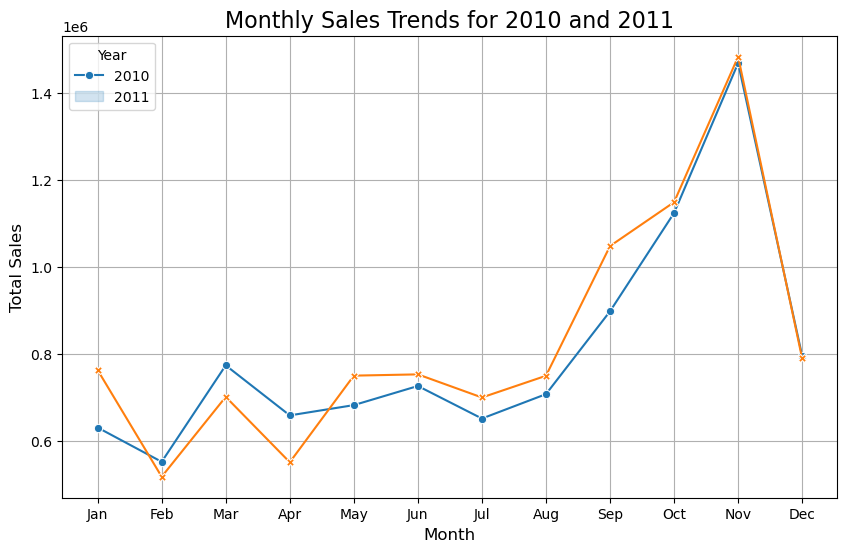

In [11]:
# Grouping data by Year and Month to calculate monthly sales
monthly_sales = df[df['Year'].isin([2010, 2011])].groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

# Pivoting the data for easier plotting
monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='TotalPrice')

# Plotting the overlayed line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales_pivot, markers=True, dashes=False)
plt.title('Monthly Sales Trends for 2010 and 2011', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', labels=['2010', '2011'])
plt.grid(True)
plt.show()

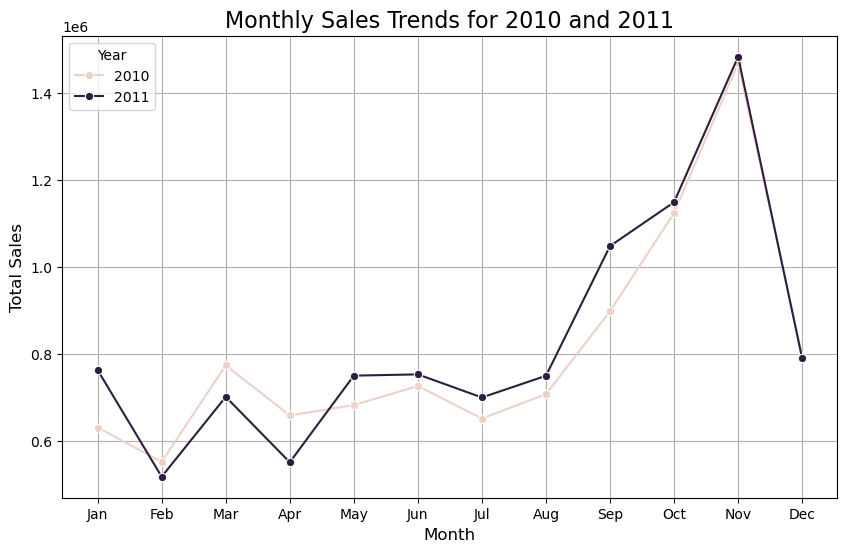

In [12]:
# Grouping data by Year and Month to calculate monthly sales
monthly_sales = df[df['Year'].isin([2010, 2011])].groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

# Plotting the overlayed line chart directly from the grouped data
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', hue='Year', marker='o')
plt.title('Monthly Sales Trends for 2010 and 2011', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

2. TOP PRODUCTS

In [14]:
topProdByQty=df.groupby('Description').agg({'Quantity':'sum'}).sort_values(by='Quantity', ascending=False).head(10).reset_index()

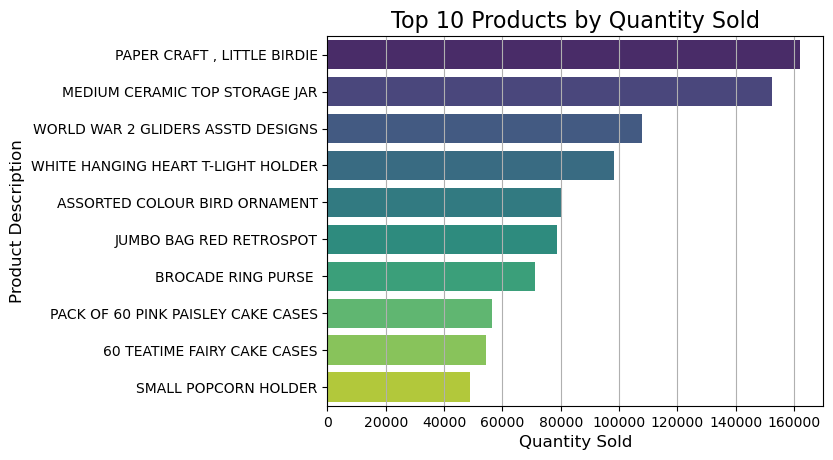

In [17]:
sns.barplot(data=topProdByQty, x='Quantity', y='Description', palette='viridis', hue='Description')
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.grid(axis='x')
plt.show()

In [21]:
top5prod=topProdByQty['Description'][0:5].tolist()
top5prod

['PAPER CRAFT , LITTLE BIRDIE',
 'MEDIUM CERAMIC TOP STORAGE JAR',
 'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'ASSORTED COLOUR BIRD ORNAMENT']

In [23]:
top5sales=df[df['Description'].isin(top5prod)].groupby('Description').agg({'TotalPrice':'sum'})

In [24]:
top5sales['revenuecontribution'] = top5sales['TotalPrice'] / sum(df['TotalPrice']) * 100
top5sales

,TotalPrice,revenuecontribution
Description,,
ASSORTED COLOUR BIRD ORNAMENT,130098.56,0.636110
MEDIUM CERAMIC TOP STORAGE JAR,159180.56,0.778305
"PAPER CRAFT , LITTLE BIRDIE",336939.20,1.647447
WHITE HANGING HEART T-LIGHT HOLDER,270377.32,1.321996
WORLD WAR 2 GLIDERS ASSTD DESIGNS,24807.29,0.121294


Revenue contribution of top 5 sold products by qty is miniscule in total sales

In [2]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Year,Month,Quarter,WeekNumber,DayOfWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009,12,4,49,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,4,49,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,4,49,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009,12,4,49,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009,12,4,49,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,4,49,Friday
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,4,49,Friday
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,4,49,Friday
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,4,49,Friday
